# Titanic Dataset
## TP1 de Projeto de Bloco: Inteligência Artificial e Machine Learning [25E1_5]
### Aluno: Lucas de Souza Ferreira


| Variável  | Tipo de Dado | Descrição | Valores Possíveis |
|-----------|--------------|-----------|-------------------|
| Survival  | Integer      | Indica se o passageiro sobreviveu | 0: Não sobreviveu, 1: Sobreviveu |
| Pclass    | Integer      | Classe da passagem | 1: Primeira Classe, 2: Segunda Classe, 3: Terceira Classe |
| Sex       | String       | Gênero do passageiro | 'male', 'female' |
| Age       | Float        | Idade do passageiro | Valor em anos (pode conter valores nulos) |
| Sibsp     | Integer      | Quantidade de irmãos/cônjuges a bordo | Número inteiro ≥ 0 |
| Parch     | Integer      | Quantidade de pais/filhos a bordo | Número inteiro ≥ 0 |
| Ticket    | String       | Número do bilhete | Código alfanumérico |
| Fare      | Float        | Valor da tarifa | Valor em libras esterlinas (£) da época |
| Cabin     | String       | Número da cabine | Código alfanumérico (pode conter valores nulos) |
| Embarked  | String       | Porto de embarque | 'C': Cherbourg, 'Q': Queenstown, 'S': Southampton |

## Importações

In [1]:
# Import de Pandas, para manipulação de dados
import pandas as pd
# Import de Seaborn, para visualização de gráficos
import seaborn as sns
# Import de Matplotlib, para visualização de gráficos
import matplotlib.pyplot as plt
# Import de Sklearn.preprocessing LabelEncoder, para transformar variáveis categóricas em numéricas
from sklearn.preprocessing import LabelEncoder
# Import de Sklearn.model_selection train_test_split, para dividir os dados em conjuntos de treino e validação
from sklearn.model_selection import train_test_split
# Import de Sklearn.preprocessing StandardScaler, para padronizar os dados
from sklearn.preprocessing import StandardScaler
# Import de Sklearn.neighbors KNeighborsClassifier, para classificação com KNN
from sklearn.neighbors import KNeighborsClassifier
# Import de Numpy, para manipulação de arrays
import numpy as np

## Carregamento dos Dados

In [2]:
# Carregando os dados
df = pd.read_csv('datasets/train.csv')

print("Titanic // Primeiras linhas:")
df.head()

Titanic // Primeiras linhas:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Informações e Estatísticas Básicas do Dataset Titanic

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Análise Estatística Descritiva

In [4]:
# Analise Estatisca Descritiva, utilizando o método describe()
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visualizando Valores Nulos

### <em style="color:lightblue;">Verificando os valores Nulos por coluna</em>

In [5]:
# Verificando os valores nulos por coluna
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Visualizando Valores

### <em style="color:lightblue;">Idade (Age) </em>

In [6]:
# Verificando a quantidade de valores nulos na coluna 'Age' e a quantidade de linhas do dataset
df[df['Age'].isnull()].shape

(177, 12)

### <em style="color:lightblue;">Visualizando a Destribuição de Idade </em>

<Axes: >

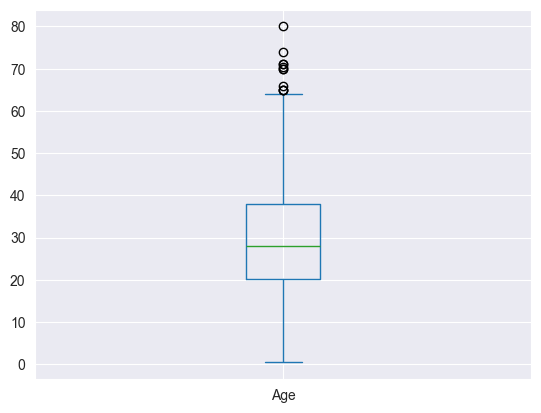

In [7]:
#Visualizando distribuição de idade dos passageiros do Titanic (com valores nulos)
df.Age.plot.box()

### <em style="color:lightblue;">Contagem de pessoas por genero em cada classe</em>

In [8]:
# Contagem de pessoas por genero em cada classe
print("Contagem de pessoas por genero em cada classe:")
df.groupby(['Pclass', 'Sex'])['Pclass'].count()

Contagem de pessoas por genero em cada classe:


Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Pclass, dtype: int64

### <em style="color:lightblue;">A porcentagem de pessoas por classe.</em>

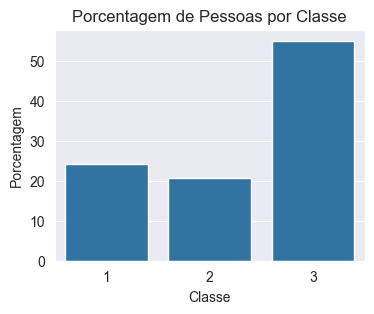

In [9]:
df['Pclass'].value_counts(normalize=True).round(2)

plt.figure(figsize=(4, 3))
sns.barplot(data=df, x='Pclass', y='Pclass', estimator=lambda x: len(x) / len(df) * 100)
plt.title('Porcentagem de Pessoas por Classe')
plt.xlabel('Classe')
plt.ylabel('Porcentagem')
plt.show()


### <em style="color:lightblue;">A MÉDIA das idades de pessoas por classe</em>

In [10]:
# A média das idades de pessoas por classe
df.groupby(['Pclass', "Sex"])['Age'].mean().round()

Pclass  Sex   
1       female    35.0
        male      41.0
2       female    29.0
        male      31.0
3       female    22.0
        male      27.0
Name: Age, dtype: float64

## Tratamento de Valores Nulos (Age)

In [11]:
#
df['Age'] = df['Age'].fillna(df.groupby(['Pclass', 'Sex'])['Age'].transform('mean'))


## Deletando Colunas irrelevantes

As Colunas que serão utilizadas como features são:
- Pclass
- Sex
- Age

A coluna que será utilizada como target é:
- Survived

### <em style="color:lightblue;">Remoção das colunas irrelevantes</em>

In [12]:
# Removendo colunas irrelevantes
# Todas, exceto Pclass, Sex, Age e Survived

df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)

### <em style="color:lightblue;">Verificando as primeiras linhas do dataset após a remoção das colunas</em>

In [13]:
# Verificando as primeiras linhas do dataset após a remoção das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


## Visualizando Taxas de Sobrevivência

### <em style="color:lightblue;">Configurando Seaborn</em>

In [14]:
# Configurando estilo do seaborn
sns.set_style("darkgrid")

### <em style="color:lightblue;">Visualizando a Taxa de Sobrevivência por Classe</em>

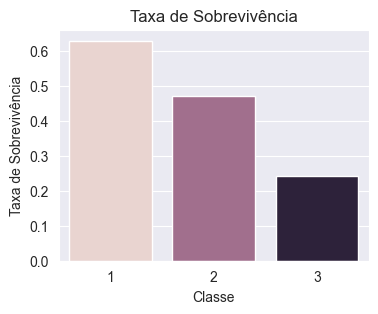

In [15]:
# Gráfico de barras para taxa de sobrevivência por classe
plt.figure(figsize=(4, 3))
sns.barplot(data=df, x='Pclass', y='Survived', hue='Pclass', errorbar=None, legend=False)
plt.title('Taxa de Sobrevivência')
plt.xlabel('Classe')
plt.ylabel('Taxa de Sobrevivência')
plt.show()

Como na terceira classe existem mais pessoas, a taxa de sobrevivência é, consequentemente, menor.

### <em style="color:lightblue;">Visualizando a Taxa de Sobrevivência por Gênero</em>

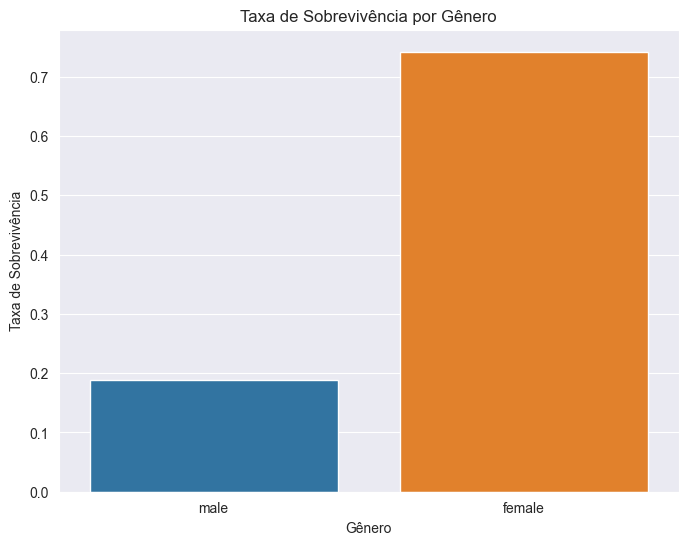

In [16]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Sex', y='Survived', hue='Sex', errorbar=None, legend=False)
plt.title('Taxa de Sobrevivência por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Taxa de Sobrevivência')
plt.show()

# Preparação dos Dados para Machine Learning

### <em style="color:lightblue;">Transformando Variáveis Categóricas em Numéricas</em>

In [17]:
# Sex e Embarked são categóricas e precisam ser transformadas em numéricas
sex_encoder = LabelEncoder()

# Transformando variáveis categóricas em numéricas no conjunto de treino
df['Sex'] = sex_encoder.fit_transform(df['Sex'])


# Treinamento do modelo

### <em style="color:lightblue;">Separando features e target</em>

In [18]:
# Separando features= X e target= Y
X = df.drop('Survived', axis=1)
Y = df['Survived']

### <em style="color:lightblue;">Divisão em conjuntos de treino e validação (80/20)</em>

In [19]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

### <em style="color:lightblue;">Padronização dos Dados</em>

In [20]:
## StandardScaler por ser mais sensível a outliers
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Definindo K

### <em style="color:lightblue;">Definindo Diferentes Valores de K</em>

In [21]:
# Definindo os valores de K para testar (de 1 a 10)
k_values = range(1, 15)
val_scores = []

### <em style="color:lightblue;">Testando diferentes valores de K</em>

In [22]:
# Testando diferentes valores de K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, Y_train)

    # Avaliando no conjunto de validação
    val_score = knn.score(X_val_scaled, Y_val)
    val_scores.append(val_score)

### <em style="color:lightblue;">Mostando gráfico para melhor visualizaçãp (1 a 15)</em>

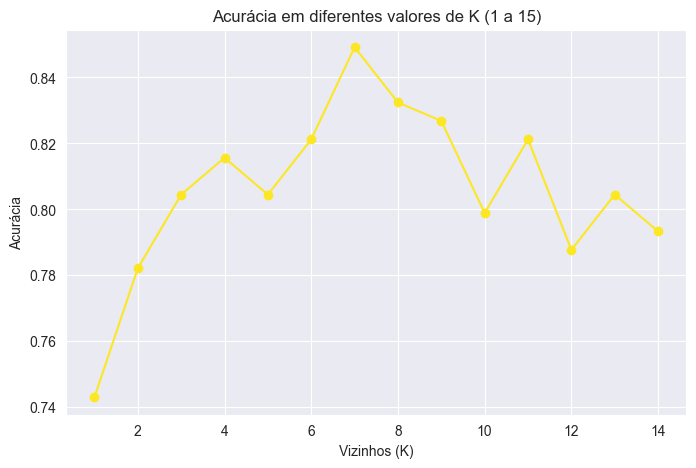

In [23]:
# Plotando o gráfico
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.viridis_r(np.linspace(0, 1, 15)))
plt.figure(figsize=(8, 5))
plt.plot(k_values, val_scores, marker='o', linestyle='-')
plt.xlabel('Vizinhos (K)')
plt.ylabel('Acurácia')
plt.title('Acurácia em diferentes valores de K (1 a 15)')
plt.grid(True)
plt.show()